In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import numpy as np

#Data Processing

In [21]:
data = datasets.load_iris()

In [22]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
data = df

In [23]:
data.isnull().any(axis=1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [24]:
data[data.isnull().any(axis=1)].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [20]:
print(data.shape[0])
data = data.dropna()
print(data.shape[0])

150
150


In [36]:
y = data[['target']].copy()
x = data.iloc[:, :-1].copy()

#Decision Tree

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [38]:
iris_classifier = DecisionTreeClassifier(max_leaf_nodes=10)
iris_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [39]:
y_predicted = iris_classifier.predict(X_test)
accuracy_score(y_test, y_predicted) * 100

94.0

#PNG

In [40]:
from sklearn import tree
tree.export_graphviz(iris_classifier, out_file='tree.dot')
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

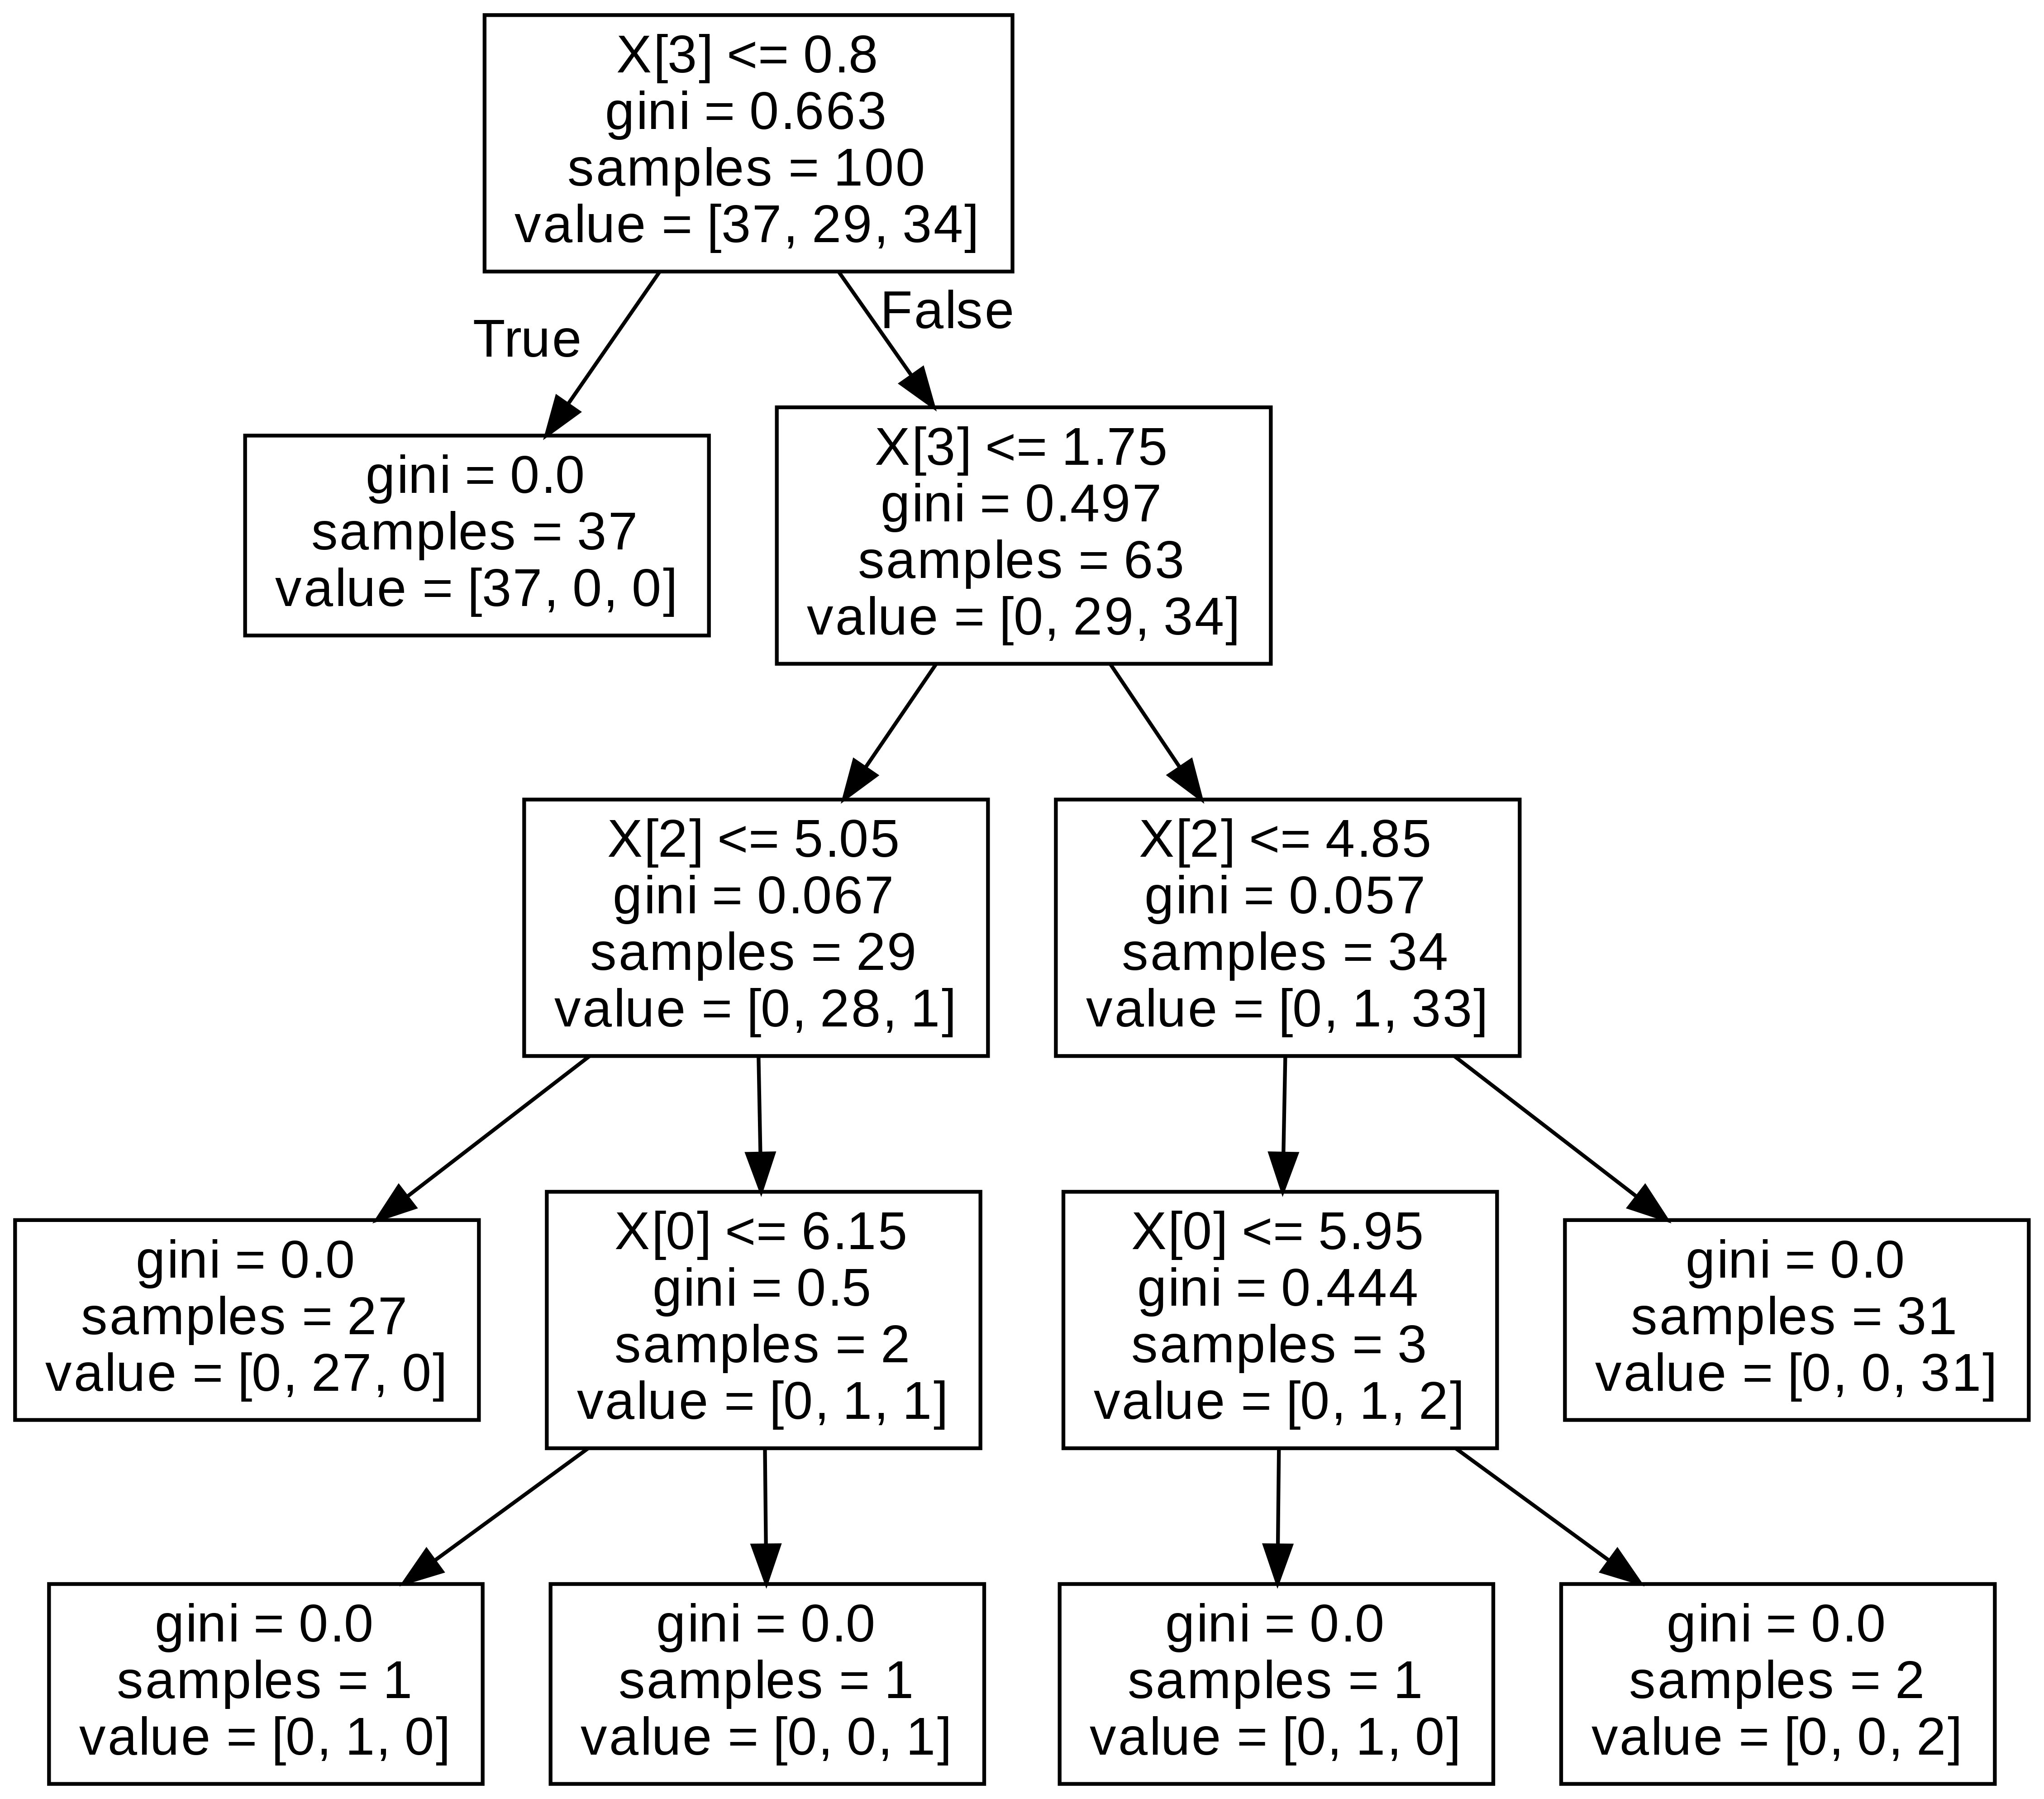

In [41]:
from IPython.display import Image
Image(filename = 'tree.png')